# **Superstore dataset**

https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

In [92]:
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scipy
! pip install plotly

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_csv("./data/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# replace null postal codes with null
df["Postal Code"].fillna(0, inplace=True)

/var/folders/xk/r3ls7bqd0b3fdrwsj9bcv3t40000gn/T/ipykernel_75507/2469484171.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Postal Code"].fillna(0, inplace=True)


In [6]:
df["Postal Code"] = df["Postal Code"].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
if df.duplicated().sum() > 0:
    print("There are duplicate values in the dataset.")
else:
    print("There are no duplicate values in the dataset.")

There are no duplicate values in the dataset.


In [9]:
types_of_customers = df.Segment.unique()
types_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
number_of_customers = df.Segment.value_counts().reset_index()
number_of_customers.rename(columns={"Segment": "Type_of_customer"}, inplace=True)
number_of_customers.head()

,Type_of_customer,count
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


In [11]:
! pip install pyspark

([<matplotlib.patches.Wedge at 0x126b1e120>,
 [Text(-1.1975097515129678, -0.07726833136124195, 'Consumer'),
  Text(1.055801932027955, -0.5703352350381639, 'Corporate'),
  Text(0.6371350371449264, 1.0168868887159148, 'Home Office')],
 [Text(-0.698547355049231, -0.0450731932940578, '52.1%'),
  Text(0.6158844603496404, -0.33269555377226223, '30.1%'),
  Text(0.37166210500120705, 0.5931840184176169, '17.8%')])

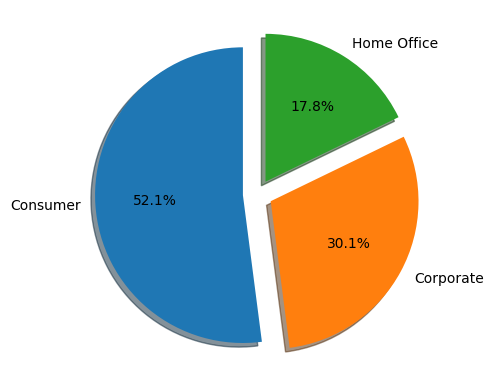

In [12]:
from pyspark.sql.functions import explode
from pyspark.sql.functions import explode
plt.pie(number_of_customers['count'], labels=number_of_customers['Type_of_customer'], explode=[0.1]*len(number_of_customers), autopct='%1.1f%%', shadow=True, startangle=90)

In [13]:
# Revenue per customer per segment
# Profitability per customer
# Order value
# Purchase frequency
# Basket size
# CAC
# LTV
# Customer satisfaction
# Churn rate

Text(0.5, 1.0, 'Sales by Segment')

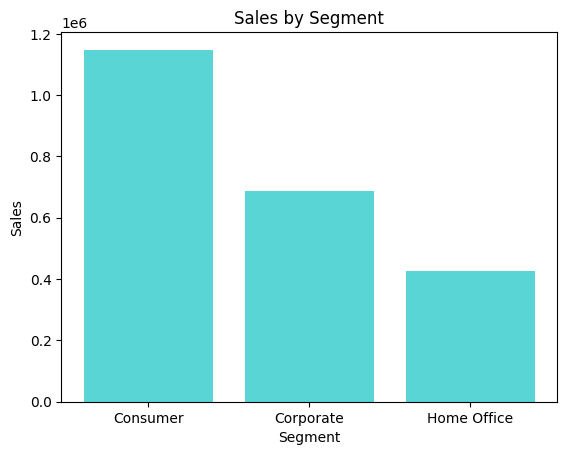

In [14]:
sales_by_segment = df.groupby('Segment')['Sales'].sum()
plt.bar(sales_by_segment.index, sales_by_segment.values, color="c", alpha=0.65)
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Sales by Segment')

([<matplotlib.patches.Wedge at 0x126c61a90>,
 [Text(-1.1996538047768808, -0.0288227112595892, 'Consumer'),
  Text(1.0126452083625674, -0.6438553269021952, 'Corporate'),
  Text(0.6679919780131018, 0.996888517994938, 'Home Office')],
 [Text(-0.6997980527865137, -0.016813248234760367, '50.8%'),
  Text(0.5907097048781642, -0.37558227402628047, '30.4%'),
  Text(0.38966198717430933, 0.5815183021637138, '18.8%')])

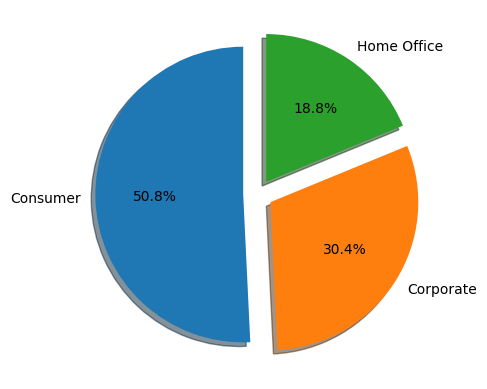

In [15]:
plt.pie(sales_by_segment.values, labels=sales_by_segment.index, explode=[0.1]*len(sales_by_segment), autopct='%1.1f%%', shadow=True, startangle=90)

In [16]:
# Loyal customers

# df.head(3)
loyal_customers = df.groupby(["Customer ID", "Customer Name", "Segment"])["Order ID"].count().reset_index()
loyal_customers.rename(columns={"Order ID": "Total orders"}, inplace=True)
repeat_customer = loyal_customers.sort_values(by="Total orders", ascending=False)
top_10 = repeat_customer.iloc[:10, :]
top_10

,Customer ID,Customer Name,Segment,Total orders
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
147,CK-12205,Chloris Kastensmidt,Consumer,32
720,SV-20365,Seth Vernon,Consumer,32
349,JD-15895,Jonathan Doherty,Corporate,32
44,AP-10915,Arthur Prichep,Consumer,31
791,ZC-21910,Zuschuss Carroll,Consumer,31
275,EP-13915,Emily Phan,Consumer,31


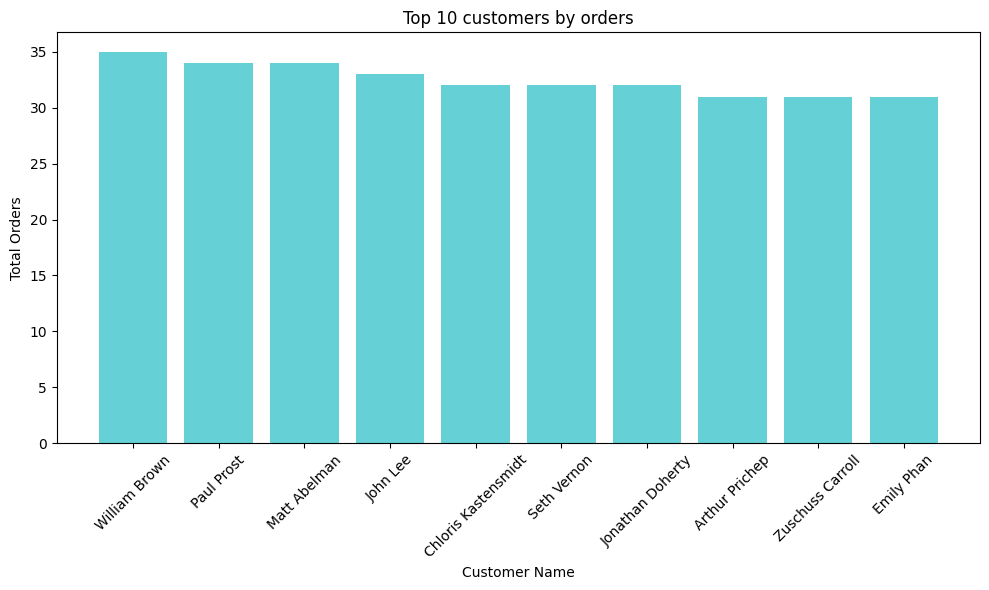

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(top_10["Customer Name"], top_10["Total orders"], color='#4BC8D1', alpha=0.85)
plt.xlabel('Customer Name')
plt.ylabel('Total Orders')
plt.title('Top 10 customers by orders')
plt.xticks(rotation=45)
plt.tight_layout() 

In [18]:
customer_sales = df.groupby(["Customer ID", "Customer Name", "Segment"])["Sales"].sum().reset_index()
customer_sales.sort_values(by="Sales", ascending=False)

,Customer ID,Customer Name,Segment,Sales
700,SM-20320,Sean Miller,Home Office,25043.050
741,TC-20980,Tamara Chand,Corporate,19052.218
621,RB-19360,Raymond Buch,Consumer,15117.339
730,TA-21385,Tom Ashbrook,Home Office,14595.620
6,AB-10105,Adrian Barton,Consumer,14473.571
...,...,...,...,...
508,MG-18205,Mitch Gastineau,Corporate,16.739
145,CJ-11875,Carl Jackson,Corporate,16.520
681,SC-20845,Sung Chung,Consumer,14.112
456,LD-16855,Lela Donovan,Corporate,5.304


In [19]:
top_10_spend = customer_sales.sort_values(by="Sales", ascending=False).head(10).reset_index(drop=True)

In [20]:
top_10_spend

,Customer ID,Customer Name,Segment,Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


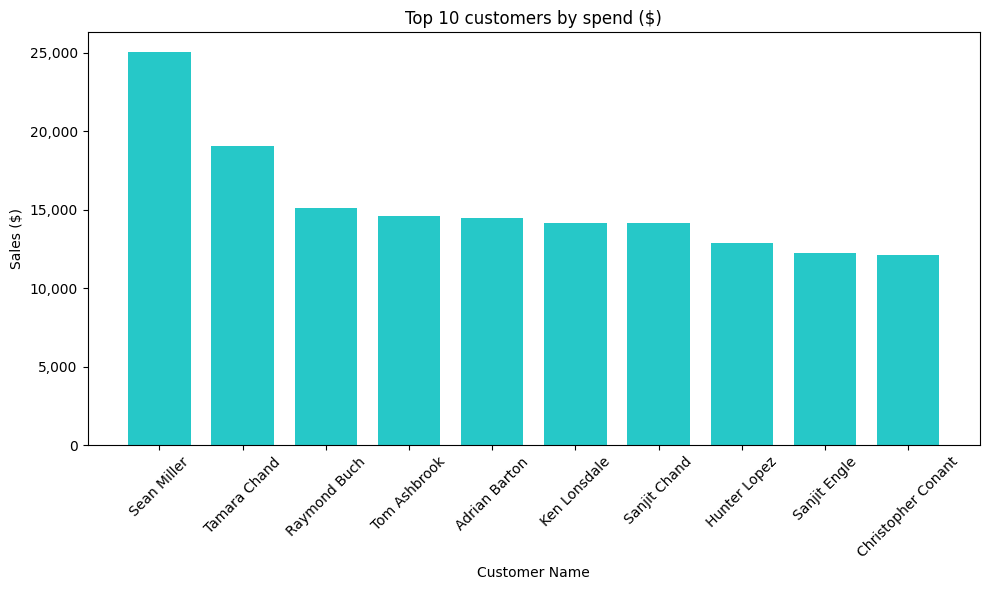

In [21]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))
plt.bar(top_10_spend['Customer Name'], top_10_spend['Sales'], color='c', alpha=0.85, width=0.75)
plt.xlabel('Customer Name')
plt.ylabel('Sales ($)')
plt.title('Top 10 customers by spend ($)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout() 

In [22]:
customer_df = df.loc[:, ["Customer Name", "Customer ID", "Sales"]]
customer_df

,Customer Name,Customer ID,Sales
0,Claire Gute,CG-12520,261.9600
1,Claire Gute,CG-12520,731.9400
2,Darrin Van Huff,DV-13045,14.6200
3,Sean O'Donnell,SO-20335,957.5775
4,Sean O'Donnell,SO-20335,22.3680
...,...,...,...
9795,Sally Hughsby,SH-19975,3.7980
9796,Cindy Schnelling,CS-12490,10.3680
9797,Cindy Schnelling,CS-12490,235.1880
9798,Cindy Schnelling,CS-12490,26.3760


In [23]:
grouped_customers = customer_df.groupby("Customer Name").agg({"Customer ID": "count", "Sales": "sum"}).sort_values(by="Customer ID", ascending=False)
grouped_customers.rename(columns={"Customer ID": "Orders"}, inplace=True)
grouped_customers

,Orders,Sales
Customer Name,,
William Brown,35,6129.710
Matt Abelman,34,4299.161
Paul Prost,34,7252.608
John Lee,33,9576.343
Jonathan Doherty,32,7610.864
...,...,...
Sung Chung,1,14.112
Carl Jackson,1,16.520
Anthony O'Donnell,1,161.280


In [24]:
# Top 10
top_10_spend_orders = grouped_customers.head(10)
top_10_spend_orders.reset_index(inplace=True)

In [25]:
top_10_spend_orders.columns

Index(['Customer Name', 'Orders', 'Sales'], dtype='object')

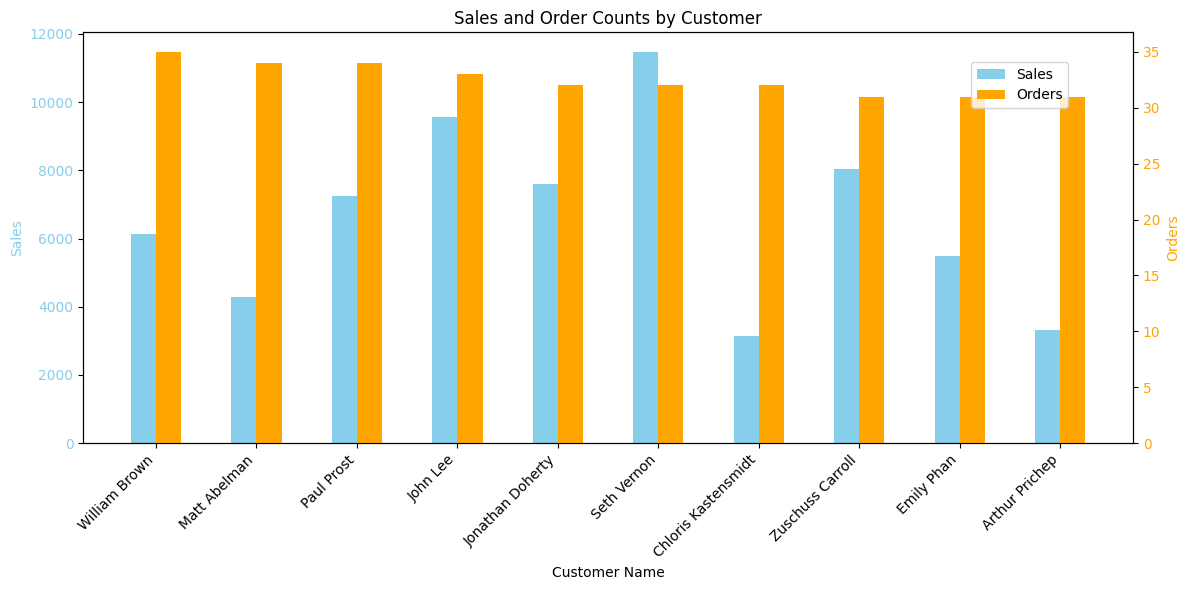

In [26]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define the width for the bars and the positions of each group of bars
bar_width = 0.25
indices = np.arange(len(top_10_spend_orders))

# Plot the Sales bars on the left y-axis
sales_bars = ax1.bar(indices - bar_width / 2, top_10_spend_orders["Sales"], bar_width, label="Sales", color="skyblue")
ax1.set_xlabel("Customer Name")
ax1.set_ylabel("Sales", color="skyblue")
ax1.tick_params(axis='y', labelcolor="skyblue")
ax1.set_xticks(indices)
ax1.set_xticklabels(top_10_spend_orders["Customer Name"], rotation=45, ha="right")

# Create the second y-axis for the Orders
ax2 = ax1.twinx()
order_bars = ax2.bar(indices + bar_width / 2, top_10_spend_orders["Orders"], bar_width, label="Orders", color="orange")
ax2.set_ylabel("Orders", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Add a legend for both bars
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))

# Adjust layout to avoid clipping
plt.title("Sales and Order Counts by Customer")
fig.tight_layout()
plt.show()

In [27]:
df_ship = df['Ship Mode'].value_counts().reset_index()

In [28]:
df_ship

,Ship Mode,count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


In [29]:
df_ship['count']

0    5859
1    1902
2    1501
3     538
Name: count, dtype: int64

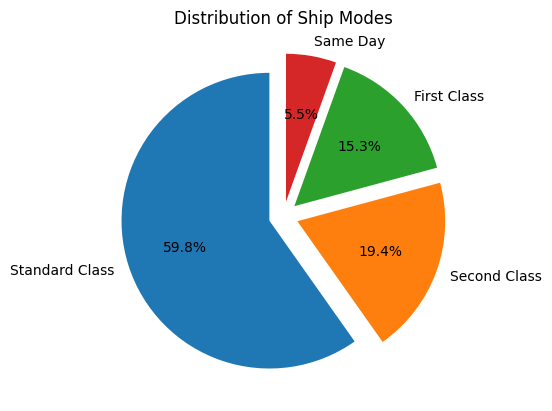

In [30]:
plt.pie(df_ship['count'], labels=df_ship['Ship Mode'], autopct='%1.1f%%', explode=[0.1]*len(df_ship), startangle=90)
plt.title('Distribution of Ship Modes')
plt.show()

In [31]:
df_state_top10 = df['State'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
df_state_top10

,State,count
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


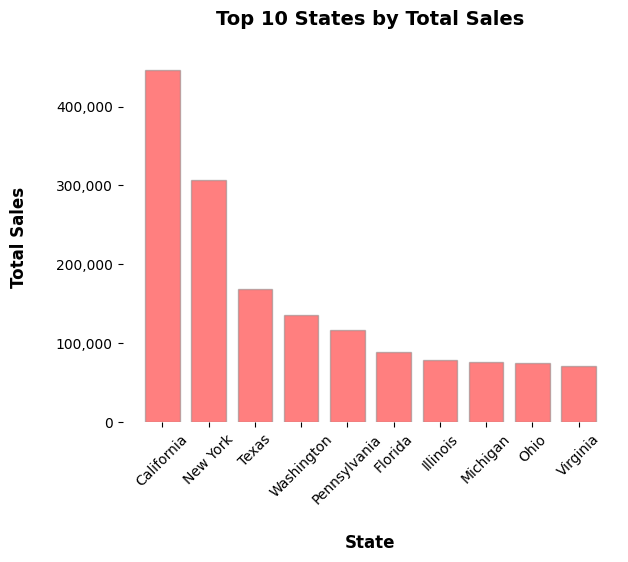

In [32]:
df_state_top10_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.bar(df_state_top10_sales['State'], df_state_top10_sales['Sales'], color='r', alpha=0.5, width=0.75, edgecolor='gray', linewidth=1)
plt.xticks(rotation=45)
plt.xlabel('State', fontweight='bold', fontsize=12, labelpad=20)
plt.ylabel('Total Sales', fontweight='bold', fontsize=12, labelpad=20)
plt.title('Top 10 States by Total Sales', fontweight='bold', fontsize=14, pad=20)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

In [33]:
! pip install --upgrade nbformat

In [89]:
df_state_top10_sales

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


In [94]:
df_state_top10_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
# ... existing code ...
import plotly.express as px

# Create an interactive bar chart
fig = px.bar(df_state_top10_sales, x='State', y='Sales', 
             title='Top 10 States by Total Sales', 
             labels={'Sales': 'Total Sales'},
             text='Sales', 
             color='Sales', 
             color_continuous_scale='Reds')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='State', yaxis_title='Total Sales', 
                  xaxis_tickangle=-45)
fig.show()

In [108]:
df_city_top10_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Create an interactive bar chart
fig = px.bar(df_state_top10_sales, x='State', y='Sales', 
             title='Top 10 City by Total Sales', 
             labels={'Sales': 'Total Sales'},
             text='Sales', 
             color='Sales', 
             color_continuous_scale='Reds'
             )

fig.update_traces(texttemplate='%{text:.2f}', 
                  textposition='outside')

fig.update_layout(xaxis_title='State', 
                  yaxis_title='Total Sales', 
                  xaxis_tickangle=-45)
fig.show()

---

## Visualise monthly sales trends

In [116]:
df_copy = df.copy()

In [120]:
df['Order Date'].head()

0    08/11/2017
1    08/11/2017
2    12/06/2017
3    11/10/2016
4    11/10/2016
Name: Order Date, dtype: object

In [170]:
df_copy["Order Date"] = pd.to_datetime(df_copy["Order Date"], format='%d/%m/%Y')
df_copy.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_month,Order_year
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,6,2017


In [169]:
df_copy["Order Date"] = pd.to_datetime(df_copy["Order Date"], format='%d/%m/%Y')
df_copy["Order_month"] = df_copy["Order Date"].dt.month
df_copy["Order_year"] = df_copy["Order Date"].dt.year
df_copy.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_month,Order_year
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,11,2017
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,11,2017
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,6,2017


In [152]:
df_monthly_sales_trends = df_copy.groupby(["Order_year", "Order_month"])["Sales"].sum().to_frame()
df_monthly_sales_trends.reset_index(inplace=True)

In [153]:
df_monthly_sales_trends.columns

Index(['Order_year', 'Order_month', 'Sales'], dtype='object')

In [167]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Plot each year as a separate trace
for year in df_monthly_sales_trends['Order_year'].unique():
    yearly_data = df_monthly_sales_trends[df_monthly_sales_trends['Order_year'] == year]
    fig.add_trace(go.Scatter(
        x=yearly_data['Order_month'],
        y=yearly_data['Sales'],
        mode='lines+markers',
        name=str(year)
    ))

# Update layout for better readability
fig.update_layout(
    title="Monthly Sales Trends by Year",
    xaxis_title="Month",
    yaxis_title="Sales",
    xaxis=dict(tickmode='array', tickvals=list(range(1, 13))),
    template="plotly_dark",
    font_family="Rockwell",
    legend=dict(orientation='h', title='', x=1, y=1.1, xanchor="right", yanchor="bottom")
)

# Show the figure
fig.show()
fig.write_html("monthly_sales_trends.html")